# Multnomial Naive Bayes Classifier - the YouTube Dataset


In this project I used the Naive Bayes Theory Classifier to examine spam and ham comments in a Youtube comments dataset.

I have splited the data for use in out model into train nd test data allowing to prediction of ham and spam comments and displayed on a Probaility Distribution Display.

## Importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
my_files = glob.glob('youtube-dataset\\*.csv')
my_files

['youtube-dataset\\Youtube01.csv',
 'youtube-dataset\\Youtube02.csv',
 'youtube-dataset\\Youtube03.csv',
 'youtube-dataset\\Youtube04.csv',
 'youtube-dataset\\Youtube05.csv']

In [3]:
all_df = []

for i in my_files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR','DATE'], axis = 1))

In [4]:
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [5]:
data = pd.concat(all_df, axis =0, ignore_index = True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [6]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [7]:
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

#### SAMPLE 1

Here I used the .CountVectorizer class which we use to distinguish words in the youtube comments. It tokenizes strings and counts the occurences of each token in the comments.

Here is an example;

In [8]:
sample_message = ["The horizon is beautiful today"]

vectorizer_sample = CountVectorizer()
vectorizer_sample.fit(sample_message)
vectorizer_sample.transform(sample_message).toarray()

array([[1, 1, 1, 1, 1]], dtype=int64)

In [9]:
vectorizer_sample.get_feature_names_out()

array(['beautiful', 'horizon', 'is', 'the', 'today'], dtype=object)

In [10]:
vectorizer_sample.transform(["This is a cat"]).toarray()

array([[0, 0, 1, 0, 0]], dtype=int64)

### SAMPLE 2

In [11]:
sample_message_2 = ["That is sunset view and over the valley the view is beautiful", 'The horizon is beauitful today']

vectorizer_sample2 = CountVectorizer()
vectorizer_sample2.fit_transform(sample_message_2).toarray()

array([[1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2],
       [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0]], dtype=int64)

In [12]:
vectorizer_sample2.get_feature_names_out()

array(['and', 'beauitful', 'beautiful', 'horizon', 'is', 'over', 'sunset',
       'that', 'the', 'today', 'valley', 'view'], dtype=object)

We notice that the words 'view' and 'the' appear twice in the output. 

#### Defining the inputs and the target. Creating the train-test split

We shall split our data into 'train data' that will train the classifie and 'test data' that will evaluate the performance of our Naive Bayes Classifier. This is a great way to avoid overfitting our model.

In [13]:
inputs = data['CONTENT']
target = data ['CLASS']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2,
                                             random_state= 365, stratify = target)

In [15]:
y_train.value_counts()

1    803
0    761
Name: CLASS, dtype: int64

In [16]:
y_test.value_counts()

1    201
0    190
Name: CLASS, dtype: int64

#### Tokenizing the YouTube comments



In [17]:
vectorizer = CountVectorizer()

In [18]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [19]:
x_train_transf.toarray()
x_train_transf.shape

(1564, 3925)

In [20]:
x_test_transf.toarray()
x_test_transf.shape

(391, 3925)

#### Performing the Classification with MultinomialNB

In [21]:
clf = MultinomialNB(class_prior = np.array([0.6, 0.4]))

In [22]:
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [23]:
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.6, 0.4]), 'fit_prior': True}

In [24]:
np.exp(clf.class_log_prior_)

array([0.6, 0.4])

#### Performing the evaluation on the test dataset

In [33]:
y_test_pred = clf.predict(x_test_transf)

In [34]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_test_pred, 
    labels = clf.classes_, 
        cmap = 'magma'
);

### Summary:The darker the number the smaller the number in the cell.

On the left columns represents all samples whose true class is (Negative) hence 0 or 'ham' and the right column row represent sample whose class is (Positive) hence 1 or 'spam'. 

- On the top-left: Contains negative samples that are True negatives: 167.

- On the top-right: Predicted to be False positives: 23.

- On the bottom-left: Incorrectly assigned hence False Negatives: 5.(The model has missed to classify as )

- On the bottom-right: Correctly predicted and Identified all spam messages hence True Positives: 196. 

Using the classification_report() class from sklearn metrics, used to measure the quality of predictions fin our classification algorithm and model set output.


In [27]:
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96       190
        Spam       0.96      0.97      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



#### Creating Probability Distribution Figures(MultinomialNB)

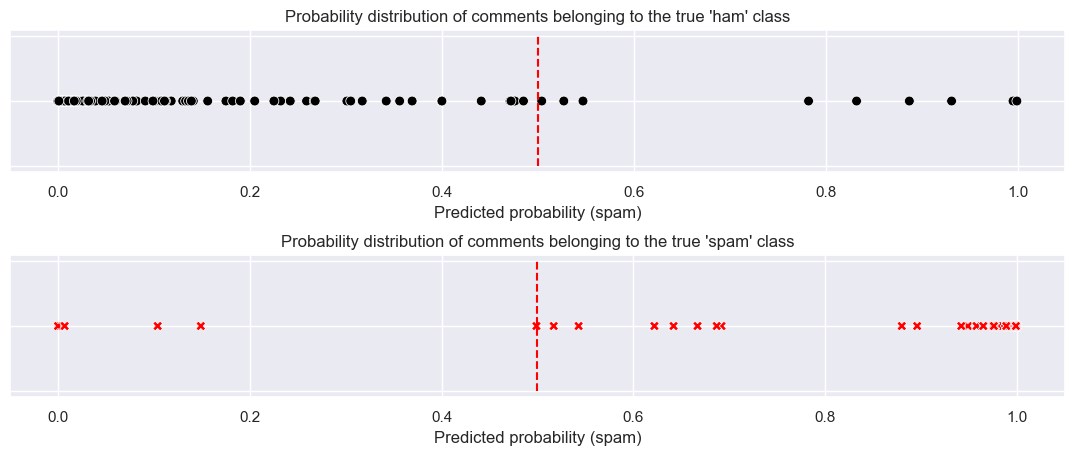

In [28]:
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

##### Making Predictions

Using our model on sample defined data 'predict_data'

In [29]:
predict_data = vectorizer.transform(['This song is amazing!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [30]:
clf.predict(predict_data)

array([0, 1], dtype=int64)